<a href="https://colab.research.google.com/github/abdularif0705/WinHacks-2022/blob/main/charging_stations_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
#Importing shapefiles
roads = gpd.read_file("/content/roads.shp")
natural = gpd.read_file("/content/natural.shp")
landuse = gpd.read_file("/content/landuse.shp")
buildings = gpd.read_file("/content/buildings.shp")
points = gpd.read_file("/content/points.shp")
places = gpd.read_file("/content/places.shp")
water = gpd.read_file("/content/waterways.shp")
railways = gpd.read_file("/content/railways.shp")

## **Windsor Geospatial Map**

No handles with labels found to put in legend.


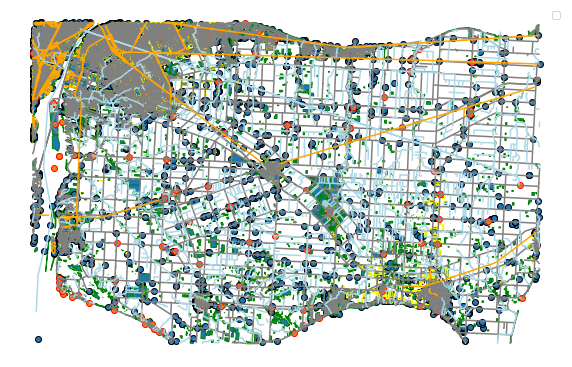

In [ ]:
#dataset = ['places','roads','natural','buildings','landuse','water','railways','points']
fig, ax = plt.subplots(figsize = (10, 10))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.legend()
plt.show()

## **Individual Map File Analysis**

* Observing unique values and their respective number in each dataset and figuring out if it is an ideal place for a public charging station or not. 
* Dropping unnecessary columns 

### **Points**

In [ ]:
points.sample(5)

,osm_id,timestamp,name,type,geometry
2714,-489802224,None,None,crossing,POINT (-82.96275 42.24985)
619,353294759,None,None,traffic_signals,POINT (-83.05554 42.31282)
2393,-2125143990,None,None,storage_tank,POINT (-82.86964 42.25406)
5511,2948698,None,Shell,fuel,POINT (-83.14503 42.24181)
11,62578082,None,None,turning_circle,POINT (-83.14325 42.26729)


In [ ]:
points.shape

(5907, 5)

In [ ]:
points['type'].value_counts()

crossing            1387
storage_tank         658
turning_circle       657
traffic_signals      424
street_lamp          377
                    ... 
charging_station       1
windmill               1
clock                  1
arts_centre            1
vending_machine        1
Name: type, Length: 111, dtype: int64

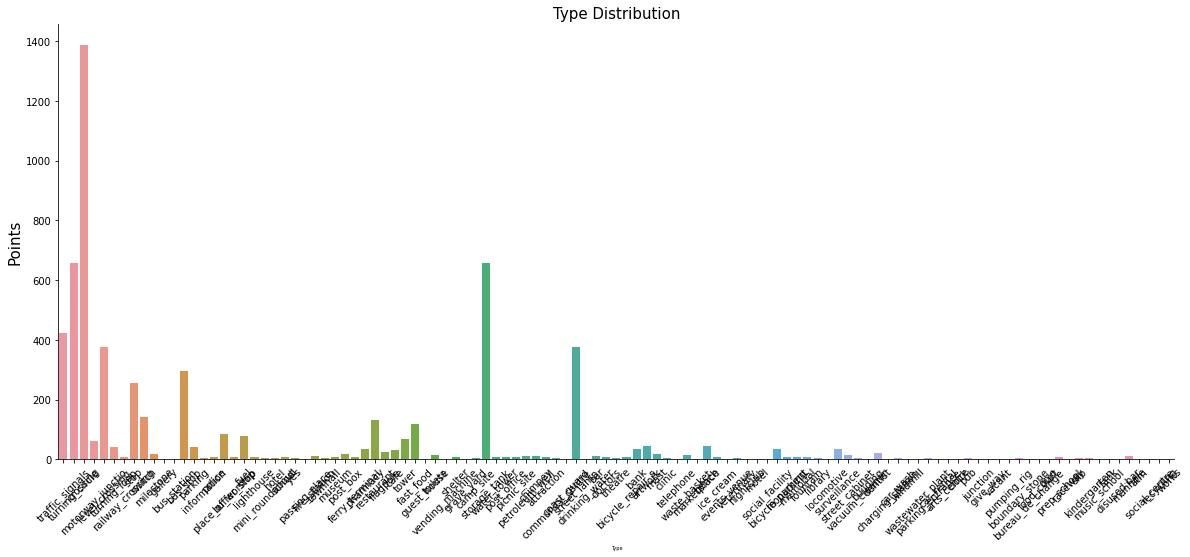

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = points)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Points', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
ax.set_xticklabels(labels=points['type'].unique(),rotation=45)
sns.despine()

In [ ]:
points['type'].unique()

array(['traffic_signals', 'turning_circle', 'crossing',
       'motorway_junctio', 'level_crossing', 'turning_loop',
       'railway_crossing', 'stop', 'switch', 'milestone', 'gallery',
       'bus_station', 'bus_stop', 'parking', 'information', 'police',
       'place_of_worship', 'buffer_stop', 'fuel', 'lighthouse',
       'mini_roundabout', 'hotel', 'school', 'yes', 'passing_place',
       'fire_station', 'townhall', 'museum', 'post_box', 'ferry_terminal',
       'pharmacy', 'restaurant', 'flagpole', 'cafe', 'tower', 'fast_food',
       'guest_house', 'toilets', 'vending_machine', 'shelter',
       'grave_yard', 'camp_site', 'storage_tank', 'water_tower',
       'post_office', 'picnic_site', 'petroleum_well', 'chimney',
       'attraction', 'community_centre', 'coast_guard', 'street_lamp',
       'drinking_water', 'bar', 'doctors', 'theatre', 'bicycle_repair_s',
       'bank', 'artwork', 'mast', 'clinic', 'telephone', 'waste_basket',
       'marketplace', 'bench', 'ice_cream', 'even

Here we can observe that it is practically useless and not feasible to have a charging station near a toilet, memorial etc. So good strategy to decrease the amount of processing data is to remove these rows.

In [ ]:
data = ['traffic_signals', 'turning_circle', 'crossing', 'level_crossing', 'turning_loop',
       'railway_crossing', 'stop', 'switch', 'gallery','parking', 'information',
       'place_of_worship', 'buffer_stop','lighthouse',
       'mini_roundabout', 'yes', 'passing_place',
       'fire_station', 'townhall', 'museum', 'post_box', 'ferry_terminal',
       'pharmacy', 'restaurant', 'flagpole', 'cafe', 'tower', 'fast_food', 'toilets', 'vending_machine', 'shelter',
       'grave_yard', 'storage_tank', 'water_tower',
       'post_office', 'picnic_site', 'petroleum_well', 'chimney',
       'attraction', 'community_centre', 'coast_guard', 'street_lamp',
       'drinking_water', 'bar', 'doctors', 'theatre',
       'bank', 'artwork', 'mast', 'clinic', 'telephone', 'waste_basket',
       'marketplace', 'bench', 'ice_cream', 'events_venue', 'veterinary',
       'nightclub', 'social_facility','monument', 'memorial', 'fountain', 'library', 'locomotive',
       'surveillance', 'street_cabinet', 'vacuum_cleaner', 
       'dentist', 'windmill','wastewater_plant', 'parking_entrance',
       'arts_centre', 'clock', 'pub', 'junction', 'give_way', 'vacant',
       'pumping_rig', 'boundary_stone', 'bureau_de_change', 'food_court',
       'dojo', 'prep_school', 'raceway', 'silo', 'kindergarten',
       'music_school', 'tank', 'disused:bar', 'manhole', 'atm',
       'social_centre', 'recycling', 'works']


# Dropping locations from data where installing Charging station is not feasible

for location in data:
  points.drop(points.loc[points['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
points =  points.drop(['timestamp','name'],axis=1)

In [ ]:
points.head()

,osm_id,type,geometry
3,18354426,motorway_junctio,POINT (-82.55877 42.24257)
7,31920568,motorway_junctio,POINT (-82.95765 42.24757)
14,62579556,motorway_junctio,POINT (-83.11480 42.30335)
17,62596048,motorway_junctio,POINT (-83.09826 42.31087)
83,62690186,milestone,POINT (-83.14879 42.24251)


### **Buildings**

In [ ]:
buildings.sample(5)

,osm_id,name,type,geometry
67694,787810935,None,None,"POLYGON ((-83.03974 42.26931, -83.03981 42.269..."
34278,783457504,None,None,"POLYGON ((-82.97003 42.31790, -82.97013 42.317..."
71753,787828197,None,None,"POLYGON ((-83.04656 42.25966, -83.04656 42.259..."
81143,787964533,None,None,"POLYGON ((-82.94574 42.26554, -82.94574 42.265..."
68141,787811382,None,None,"POLYGON ((-83.04555 42.27385, -83.04550 42.273..."


In [ ]:
buildings.shape

(87791, 4)

In [ ]:
buildings['type'].value_counts()

house              17180
garage              3316
commercial           278
industrial           265
retail               222
                   ...  
oil_tank               1
interlocking           1
public_building        1
coast_guard            1
works                  1
Name: type, Length: 88, dtype: int64

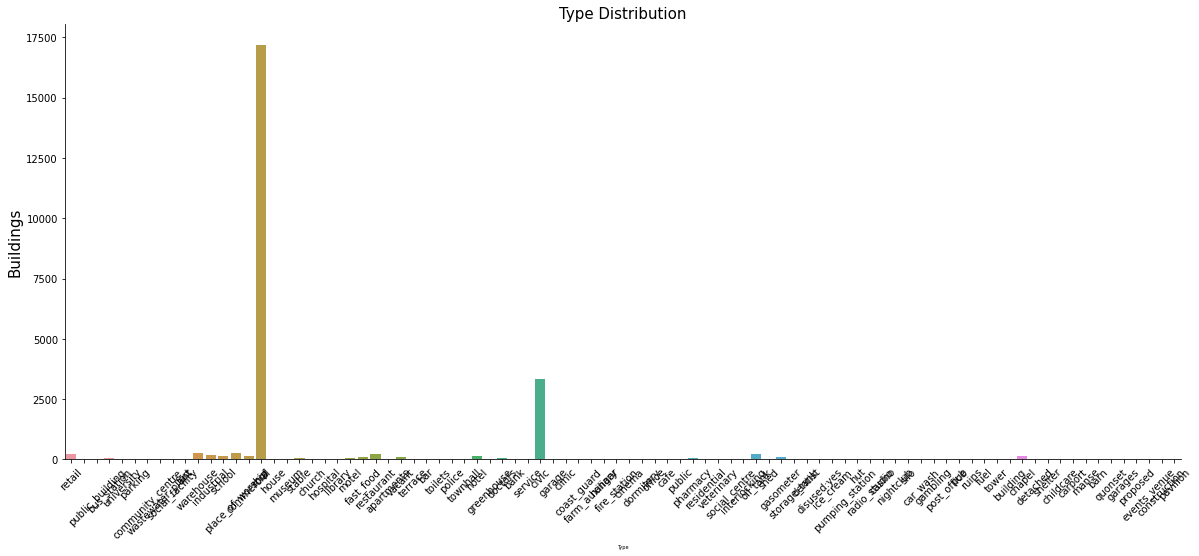

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = buildings)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Buildings', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
ax.set_xticklabels(labels=buildings['type'].unique(),rotation=45)
sns.despine()

In [ ]:
buildings['type'].unique()

array(['retail', None, 'public_building', 'bus_station', 'university',
       'parking', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'industrial', 'school',
       'place_of_worship', 'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'hospital', 'library', 'motel', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'hotel', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'garage', 'clinic', 'coast_guard',
       'farm_auxiliary', 'hangar', 'fire_station', 'cinema', 'dormitory',
       'office', 'cafe', 'public', 'pharmacy', 'residential',
       'veterinary', 'social_centre', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream',
       'pumping_station', 'hut', 'radio_studio', 'casino', 'nightclub',
       'silo', 'car_wash', 'gambling', 'post_office', 'pub', 'ruins',
       'fuel', 'tower', 'b

Again we can observe that it is not feasible to have a charging station near a fort, oil tank, tower etc. So good strategy to decrease the amount of processing data is to remove these rows.

In [ ]:
data = ['None', 'public_building', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'place_of_worship', 
       'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'library', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'clinic', 'coast_guard', 'farm_auxiliary', 
       'hangar', 'fire_station', 'cinema', 'dormitory', 'cafe', 'pharmacy',
       'veterinary', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream', 'hut',
       'radio_studio', 'casino', 'nightclub', 'silo', 'gambling',
        'post_office', 'pub', 'ruins', 'tower', 'chapel', 'detached', 
       'shelter', 'childcare', 'manse', 'barn', 'quonset','proposed',
       'events_venue', 'construction', 'pavilion']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  buildings.drop(buildings.loc[buildings['type'] == location ].index, inplace=True)

In [ ]:
buildings.drop(buildings.loc[buildings['type'] == None ].index, inplace=True)

In [ ]:
#Dropping useless columns
buildings =  buildings.drop(['name'],axis=1)

In [ ]:
buildings.head()

,osm_id,type,geometry
0,23348166,retail,"POLYGON ((-82.93770 42.31559, -82.93753 42.315..."
1,23348398,None,"POLYGON ((-82.93841 42.31250, -82.93825 42.312..."
2,23348456,retail,"POLYGON ((-82.94159 42.31351, -82.94135 42.313..."
4,23375623,retail,"POLYGON ((-82.92992 42.31544, -82.92992 42.315..."
5,23388679,bus_station,"POLYGON ((-83.04335 42.31790, -83.04315 42.317..."


### **Landuse**

In [ ]:
landuse.sample(5)

,osm_id,name,type,geometry
2515,793974710,None,retail,"POLYGON ((-83.05166 42.29398, -83.05148 42.293..."
965,659236933,None,residential,"POLYGON ((-82.91666 42.03666, -82.91685 42.036..."
2182,788730575,None,residential,"POLYGON ((-82.95160 42.31128, -82.95405 42.315..."
759,658475139,None,residential,"POLYGON ((-82.92688 42.03795, -82.92686 42.038..."
1209,669546283,None,residential,"POLYGON ((-82.92640 42.03455, -82.92644 42.034..."


In [ ]:
landuse.shape

(3342, 4)

In [ ]:
landuse['type'].value_counts()

residential         1179
industrial           548
retail               499
grass                465
commercial           174
farmland             119
religious            106
brownfield            67
cemetery              61
reservoir             28
meadow                25
quarry                13
construction          12
landfill               9
basin                  8
farmyard               7
recreation_groun       6
allotments             4
railway                3
military               3
orchard                2
vineyard               1
civic_admin            1
plant_nursery          1
greenhouse_horti       1
Name: type, dtype: int64

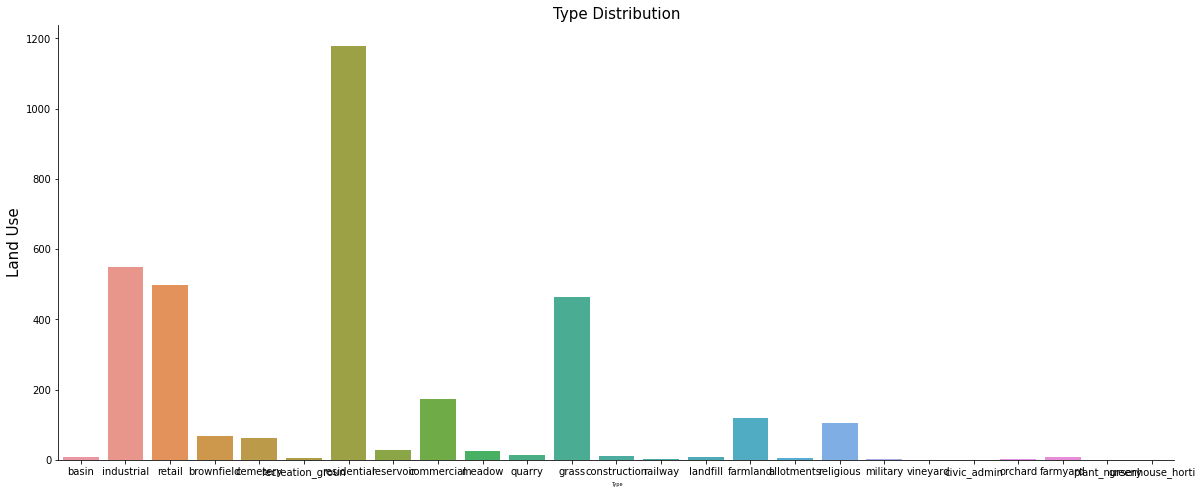

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = landuse)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Land Use', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
landuse['type'].unique()

array(['basin', 'industrial', 'retail', 'brownfield', 'cemetery',
       'recreation_groun', 'residential', 'reservoir', 'commercial',
       'meadow', 'quarry', 'grass', 'construction', 'railway', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti'], dtype=object)

Here we can easily notice that having a charging station near a grass, orchard etc. is not a great in sense of optimisation. So good strategy to decrease the amount of processing data is to remove these rows.

In [ ]:
data = ['basin', 'industrial', 'brownfield', 'cemetery',
       'recreation_groun', 'reservoir',
       'meadow', 'quarry', 'grass', 'construction', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  landuse.drop(landuse.loc[landuse['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
landuse =  landuse.drop(['name'],axis=1)

In [ ]:
landuse.head()

,osm_id,type,geometry
3,23375580,retail,"POLYGON ((-83.02855 42.26674, -83.02798 42.265..."
4,23375626,retail,"POLYGON ((-82.92957 42.31667, -82.92903 42.314..."
5,23375632,retail,"POLYGON ((-82.93794 42.31317, -82.93224 42.314..."
6,23375640,retail,"POLYGON ((-82.94223 42.31734, -82.94086 42.315..."
7,23375653,retail,"POLYGON ((-82.94514 42.31525, -82.94202 42.315..."


### **Water**

In [ ]:
water.sample(5)

,osm_id,name,type,width,geometry
2004,205150709,None,stream,NaN,"LINESTRING (-82.63572 42.14391, -82.63561 42.1..."
123,179816088,None,stream,NaN,"LINESTRING (-82.69466 42.03941, -82.69483 42.0..."
3842,412971460,Sturgeon Creek,stream,NaN,"LINESTRING (-82.57980 42.04991, -82.57949 42.0..."
1995,205150700,None,stream,NaN,"LINESTRING (-82.62568 42.15164, -82.62572 42.1..."
1055,204872033,None,stream,NaN,"LINESTRING (-82.99707 42.14866, -82.99714 42.1..."


In [ ]:
water.shape

(4007, 5)

In [ ]:
water['type'].value_counts()

stream    3777
drain      160
ditch       38
river       24
dock         5
dam          2
canal        1
Name: type, dtype: int64

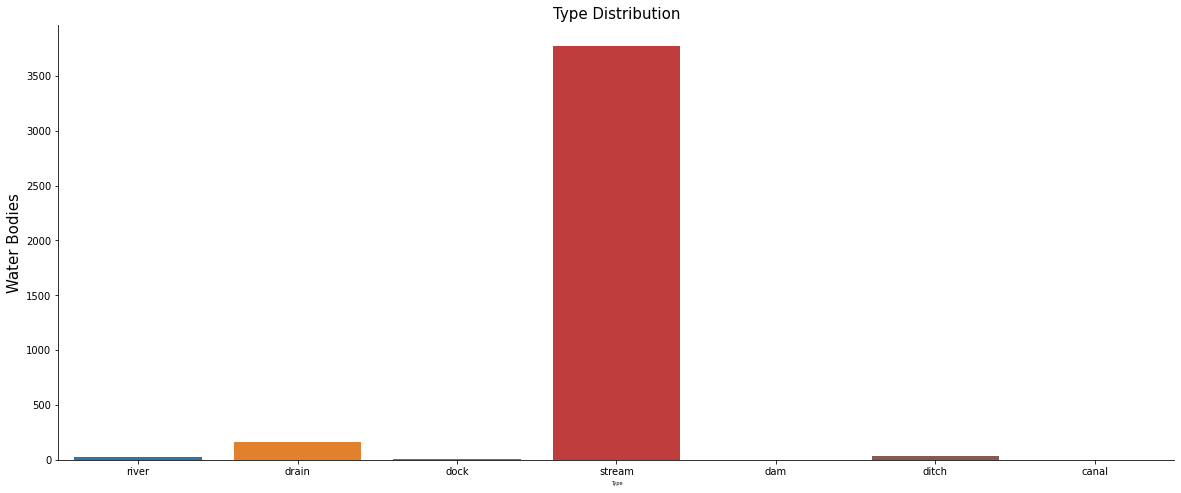

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = water)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Water Bodies', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
water['type'].unique()

array(['river', 'drain', 'dock', 'stream', 'dam', 'ditch', 'canal'],
      dtype=object)

There is no way we can put a charging station inside a water body excpet a dockyard. So good strategy to decrease the amount of processing data is to remove these rows.

In [ ]:
data = ['river', 'drain','stream', 'dam', 'ditch', 'canal']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  water.drop(water.loc[water['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
water =  water.drop(['name','width'],axis=1)

In [ ]:
water.head()

,osm_id,type,geometry
2,4894669,dock,"LINESTRING (-83.10137 42.27106, -83.10033 42.2..."
3867,560092401,dock,"LINESTRING (-83.12502 42.25973, -83.12485 42.2..."
3868,560092402,dock,"LINESTRING (-83.12444 42.25944, -83.12432 42.2..."
3900,641696037,dock,"LINESTRING (-82.70888 42.29813, -82.70891 42.2..."
3939,791845924,dock,"LINESTRING (-82.46652 42.30798, -82.46652 42.3..."


### **Railways**

In [ ]:
railways.sample(5)

,osm_id,name,type,geometry
277,160796415,None,rail,"LINESTRING (-83.09978 42.26896, -83.09949 42.2..."
1170,561917656,None,abandoned,"LINESTRING (-83.11239 42.12283, -83.11269 42.1..."
486,161821932,None,rail,"LINESTRING (-83.10160 42.26684, -83.10151 42.2..."
1165,560092400,None,abandoned,"LINESTRING (-83.12602 42.26134, -83.12606 42.2..."
810,165658885,None,rail,"LINESTRING (-83.13785 42.27663, -83.13796 42.2..."


In [ ]:
railways.shape

(1221, 4)

In [ ]:
railways['type'].value_counts()

rail         1076
abandoned      86
disused        50
yard            7
turntable       1
razed           1
Name: type, dtype: int64

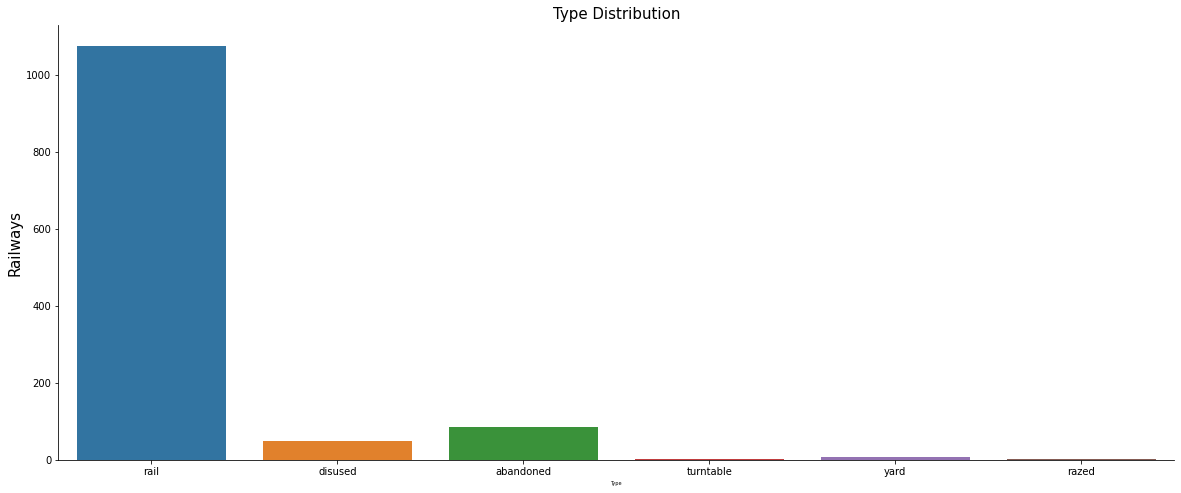

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = railways)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Railways', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
railways['type'].unique()

array(['rail', 'disused', 'abandoned', 'turntable', 'yard', 'razed'],
      dtype=object)

We can use abandoned railway stations to create a charging station this will effectively utilise the space since it is a valuable landmark already. Dropping the rest of them.

In [ ]:
data = ['rail', 'disused', 'turntable', 'yard', 'razed']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  railways.drop(railways.loc[railways['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
railways =  railways.drop(['name'],axis=1)

In [ ]:
railways.head()

,osm_id,type,geometry
39,8733493,abandoned,"LINESTRING (-83.13030 42.29039, -83.13040 42.2..."
52,8742730,abandoned,"LINESTRING (-83.14178 42.21921, -83.14211 42.2..."
54,8746328,abandoned,"LINESTRING (-83.12910 42.29239, -83.12939 42.2..."
55,8746363,abandoned,"LINESTRING (-83.11881 42.29049, -83.11872 42.2..."
96,23306775,abandoned,"LINESTRING (-82.95930 42.24705, -82.96014 42.2..."


### **Natural**

In [ ]:
natural.sample(5)

,osm_id,name,type,geometry
875,205003961,None,water,"POLYGON ((-82.95066 42.21902, -82.95075 42.219..."
430,204615089,None,water,"POLYGON ((-82.93864 42.04330, -82.93867 42.043..."
2506,656304926,None,park,"POLYGON ((-82.71620 42.20180, -82.71564 42.201..."
1637,205713251,None,forest,"POLYGON ((-82.55942 42.05589, -82.55909 42.062..."
2313,382132017,Secondary Clarifier,water,"POLYGON ((-83.12071 42.29024, -83.12074 42.290..."


In [ ]:
natural.shape

(2734, 4)

In [ ]:
natural['type'].value_counts()

forest    1646
water      773
park       315
Name: type, dtype: int64

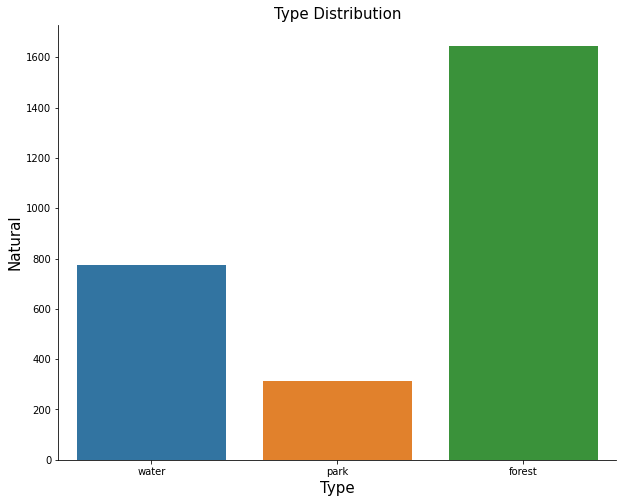

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'type', data = natural)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Natural', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
natural['type'].unique()

array(['water', 'park', 'forest'], dtype=object)

Having a charging station inside a water body and forest is impossible without extra establishment cost so dropping them is a good idea. Parks can be counted in since it is a common place amongst locality residents we can give some area to the charging station for level 1 at least.

In [ ]:
data = ['water', 'forest']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  natural.drop(natural.loc[natural['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
natural =  natural.drop(['name'],axis=1)

In [ ]:
natural.head()

,osm_id,type,geometry
10,23297293,park,"POLYGON ((-83.02329 42.25994, -83.02300 42.260..."
11,23306214,park,"POLYGON ((-82.94930 42.32060, -82.94827 42.318..."
12,23364273,park,"POLYGON ((-82.94569 42.30600, -82.94515 42.306..."
13,23388496,park,"POLYGON ((-83.02515 42.29622, -83.02513 42.296..."
14,23394507,park,"POLYGON ((-83.07646 42.29010, -83.07549 42.289..."


### **Roads**

In [ ]:
roads.sample(5)

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
18112,776148414,None,None,service,0,0,NaN,"LINESTRING (-83.08362 42.27022, -83.08372 42.2..."
7972,147607290,Monty Street,None,residential,0,0,NaN,"LINESTRING (-83.07696 42.24021, -83.07587 42.2..."
15382,653404538,None,None,service,0,0,NaN,"LINESTRING (-82.93154 42.29982, -82.93111 42.2..."
11927,479269121,Bruce Crozier's Way,3,trunk,1,0,80.0,"LINESTRING (-82.87466 42.19589, -82.87603 42.1..."
8579,172739517,None,None,service,0,0,NaN,"LINESTRING (-83.00874 42.29121, -83.00825 42.2..."


In [ ]:
roads.shape

(23329, 8)

In [ ]:
roads['type'].value_counts()

service           8079
residential       6306
footway           3556
secondary         1440
tertiary          1180
unclassified       820
path               592
motorway           262
motorway_link      236
primary            175
trunk              156
cycleway           122
construction        89
trunk_link          83
secondary_link      67
track               55
tertiary_link       31
steps               27
pedestrian          18
raceway             12
proposed             8
corridor             7
primary_link         5
bridleway            2
living_street        1
Name: type, dtype: int64

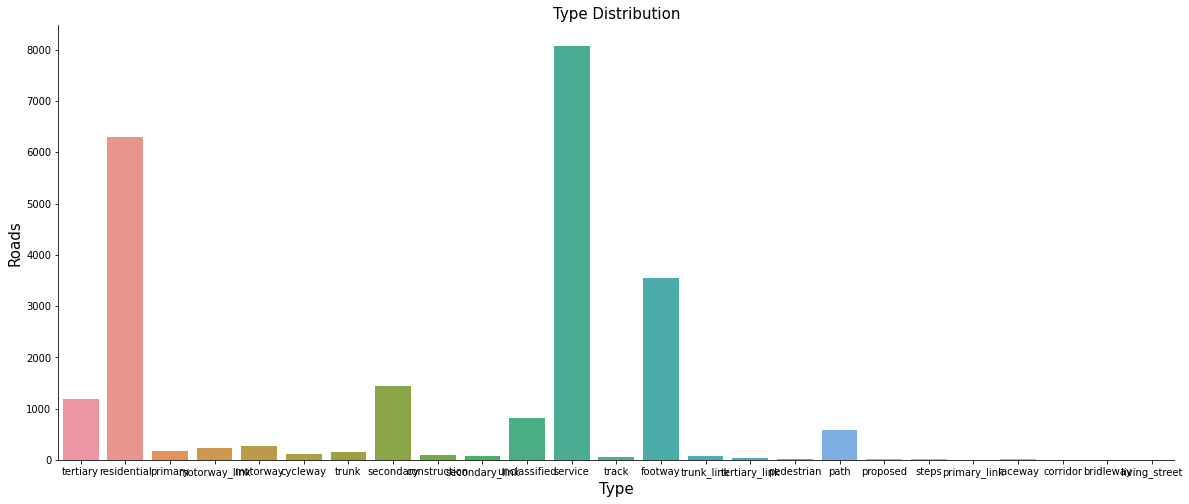

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = roads)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Roads', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
roads['type'].unique()

array(['tertiary', 'residential', 'primary', 'motorway_link', 'motorway',
       'cycleway', 'trunk', 'secondary', 'construction', 'secondary_link',
       'unclassified', 'service', 'track', 'footway', 'trunk_link',
       'tertiary_link', 'pedestrian', 'path', 'proposed', 'steps',
       'primary_link', 'raceway', 'corridor', 'bridleway',
       'living_street'], dtype=object)

Dropping roads which are less visited and unlikely to have an establishment.

In [ ]:
data = ['trunk','construction', 'secondary_link', 'unclassified', 'service',
         'track', 'footway', 'trunk_link', 'tertiary_link', 'pedestrian', 
         'path', 'proposed', 'steps', 'primary_link', 'raceway', 
         'corridor', 'bridleway']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  roads.drop(roads.loc[roads['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
roads =  roads.drop(['name','ref','oneway','bridge','maxspeed'],axis=1)

In [ ]:
roads.head()

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."


### **Places**

In [ ]:
places.sample(5)

,osm_id,name,type,population,geometry
80,-2134708464,Turkey Island,island,NaN,POINT (-83.11346 42.18553)
63,-2143725965,South Woodslee,hamlet,NaN,POINT (-82.71848 42.20268)
112,1892215189,Lakeshore,town,36611.0,POINT (-82.81893 42.30383)
95,-2128927889,East Windsor,neighbourhood,NaN,POINT (-82.97892 42.31245)
73,-2136788666,Fighting Island,island,NaN,POINT (-83.11871 42.21832)


In [ ]:
places.shape

(124, 5)

In [ ]:
places['type'].value_counts()

locality            58
neighbourhood       24
village              9
town                 9
island               9
hamlet               9
county               2
city                 1
village;locality     1
islet                1
suburb               1
Name: type, dtype: int64

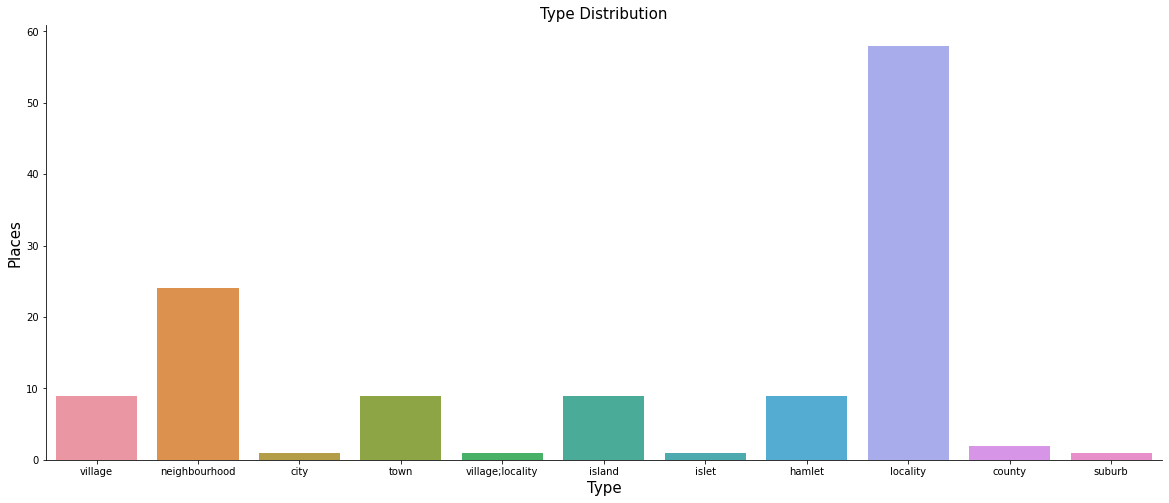

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = places)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Places', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [ ]:
places['type'].unique()

array(['village', 'neighbourhood', 'city', 'town', 'village;locality',
       'island', 'islet', 'hamlet', 'locality', 'county', 'suburb'],
      dtype=object)

Installing a charging station at a village is useless since people might not be able to afford such luxury at the moment and the probability of villagers to have a self owned transport is less likely as well and if they have one it is for multipurpose and electric vehicle may not serve them the best.

In [ ]:
data = ['village', 'neighbourhood', 'village;locality',
       'island', 'islet', 'hamlet', 'locality']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  places.drop(places.loc[places['type'] == location ].index, inplace=True)

In [ ]:
#Dropping useless columns
places =  places.drop(['name','population'],axis=1)

In [ ]:
places.head()

,osm_id,type,geometry
3,253421090,city,POINT (-83.03534 42.31710)
4,254023814,town,POINT (-83.06065 42.24506)
5,254023816,town,POINT (-82.88620 42.31180)
7,260233622,town,POINT (-82.59970 42.05312)
8,260234802,town,POINT (-82.82155 42.17448)


## **Combined Analysis**

No handles with labels found to put in legend.


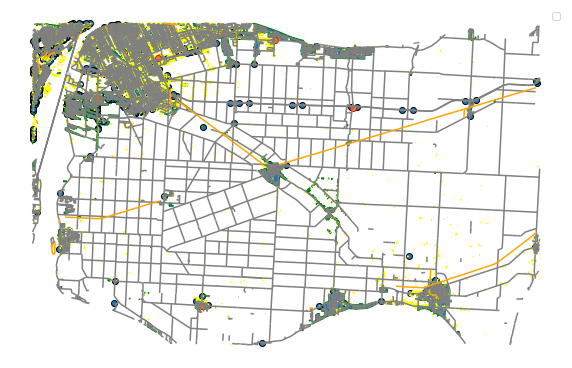

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.legend()
plt.show()


In [ ]:
combined = roads.append(natural)
combined = combined.append(points)
combined = combined.append(landuse)
combined = combined.append(water)
combined = combined.append(places)
combined = combined.append(buildings)
combined = combined.append(railways)

In [ ]:
combined.shape

(81088, 3)

In [ ]:
combined.drop_duplicates()

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."
...,...,...,...
1212,1009997990,abandoned,"LINESTRING (-83.12751 42.28833, -83.12494 42.2..."
1213,1009997995,abandoned,"LINESTRING (-83.11784 42.28924, -83.11746 42.2..."
1214,1010001949,abandoned,"LINESTRING (-83.10869 42.28873, -83.10885 42.2..."
1215,1010001950,abandoned,"LINESTRING (-83.10924 42.28828, -83.10943 42.2..."


In [ ]:
combined.sample(5)

,osm_id,type,geometry
67601,787810703,None,"POLYGON ((-83.04015 42.26653, -83.04007 42.266..."
54613,785374011,None,"POLYGON ((-83.01361 42.24463, -83.01363 42.244..."
69756,787818699,None,"POLYGON ((-83.03497 42.30130, -83.03510 42.301..."
1133,23551387,residential,"LINESTRING (-82.95649 42.30951, -82.95592 42.3..."
76464,787834913,None,"POLYGON ((-83.05929 42.28163, -83.05919 42.281..."


<Figure size 720x720 with 0 Axes>

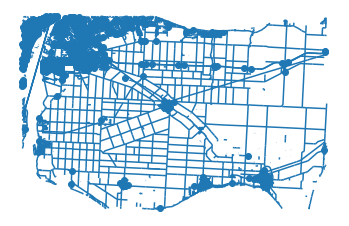

In [ ]:
plt.figure(figsize=(10,10))
combined.plot()
plt.axis('off')
plt.show()

In [ ]:
combined['type'].unique()

array(['tertiary', 'residential', 'primary', 'motorway_link', 'motorway',
       'cycleway', 'secondary', 'living_street', 'park',
       'motorway_junctio', 'milestone', 'bus_station', 'bus_stop',
       'police', 'fuel', 'hotel', 'school', 'guest_house', 'camp_site',
       'bicycle_repair_s', 'motel', 'bicycle_parking', 'building',
       'charging_station', 'car_wash', 'car_rental', 'retail',
       'commercial', 'railway', 'dock', 'city', 'town', 'county',
       'suburb', None, 'university', 'parking', 'industrial', 'hospital',
       'garage', 'office', 'public', 'social_centre', 'pumping_station',
       'carport', 'garages', 'works', 'abandoned'], dtype=object)

We can observe a lot of categories in the type column which can be grouped into similar entitites for easy understanding and machine learning modelling. So based on human understanding we map the places with 2 categories of charging stations that the place is likely to have
* Public
* Private

We create another column and manually map the types with their respective potential charging station

In [ ]:
combined['charging_station'] = combined['type'].map({'tertiary':'public', 'residential':'private', 
                      'primary':'public', 'motorway_link':'public', 'motorway':'public',
                      'cycleway':'public', 'secondary':'public', 'living_street':'public', 
                      'park':'public', 'motorway_junctio':'public', 
                      'milestone':'public', 'bus_station':'public', 'bus_stop':'public',
                      'police':'private', 'fuel':'public', 'hotel':'private',
                      'school':'private', 'guest_house':'private', 'camp_site':'public',
                      'bicycle_repair_s':'public', 'motel':'private', 
                      'bicycle_parking':'public', 'building':'private',
                      'charging_station':'public', 'car_wash':'private', 
                      'car_rental':'private', 'retail':'public', 'commercial':'public', 
                      'railway':'public', 'dock':'public', 'town':'public', 'county':'public',
                       'None':'public', 'university':'private', 'parking':'public', 
                      'industrial':'private', 'hospital':'public', 'garage':'private', 
                      'office':'private', 'public':'public', 'social_centre':'public',
                      'pumping_station':'public', 'carport':'public', 'garages':'public',
                      'works':'private', 'abandoned':'public', 'city':'public' ,'suburb':'public'})

In [ ]:
combined.head()

,osm_id,type,geometry,charging_station
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2...",public
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2...",private
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2...",private
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2...",private
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2...",private


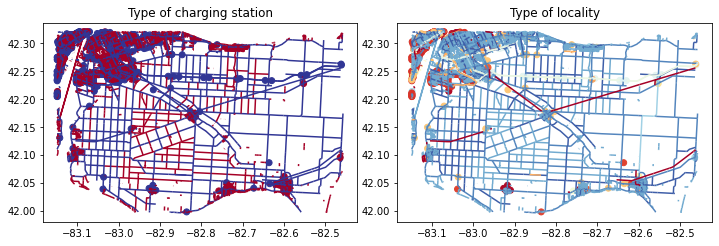

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
combined.plot(column='charging_station', cmap='RdYlBu', ax=ax1)
ax1.set_title('Type of charging station')
combined.plot(column='type', cmap='RdYlBu', ax=ax2)
ax2.set_title('Type of locality')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()

## **Machine Learning**

### **Data Preparation**

### **Data Modelling**